<a href="https://colab.research.google.com/github/shawnsmothers/Health-Insurance-Cost-Linear-Regress/blob/main/health_insurance_cost_eda_and_linear_regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [ ]:
# load the insurance dataset from github
insurance_df  = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [ ]:
insurance_df.shape

(1338, 7)

**Notes**

charges has mix of dollar  in some.  get rid of $ signs and make a float

check for nan

check for duplicats

all columns have some nulls.



In [ ]:
# check for duplicates
insurance_df.duplicated().sum()

1

In [ ]:
# get rid of duplicates
insurance_df = insurance_df.drop_duplicates()

In [ ]:
# get rid of $ in change and convert obj to float
insurance_df['charges'] = insurance_df['charges'].str.replace('$', '').astype(float)

<ipython-input-50-23c6cdb082f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['charges'] = insurance_df['charges'].str.replace('$', '').astype(float)


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1272 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.6+ KB


In [ ]:
# change null in age to the average
insurance_df['age'].fillna(insurance_df['age'].mean(), inplace=True)

<ipython-input-52-e617bb2fbcef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['age'].fillna(insurance_df['age'].mean(), inplace=True)


In [ ]:
# change null in bmi to the average
insurance_df['bmi'].fillna(insurance_df['bmi'].mean(), inplace=True)

<ipython-input-53-16fb6507a5de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['bmi'].fillna(insurance_df['bmi'].mean(), inplace=True)


In [ ]:
# change chargers nulls to the mean
insurance_df['charges'].fillna(insurance_df['charges'].mean(), inplace=True)

<ipython-input-54-6c3ec6fa93c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['charges'].fillna(insurance_df['charges'].mean(), inplace=True)


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.6+ KB


In [ ]:
# change nulls in childeren to the mode
insurance_df['children'].fillna(insurance_df['children'].mode()[0], inplace=True)

<ipython-input-56-ee0af7c2b9a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['children'].fillna(insurance_df['children'].mode()[0], inplace=True)


In [ ]:
# change region nulls to the mode
insurance_df['region'].fillna(insurance_df['region'].mode()[0], inplace=True)

<ipython-input-57-9cb2f5e6562c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['region'].fillna(insurance_df['region'].mode()[0], inplace=True)


In [ ]:
# change sex null to the mode
insurance_df['sex'].fillna(insurance_df['sex'].mode()[0], inplace=True)

<ipython-input-58-7cc2371615e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['sex'].fillna(insurance_df['sex'].mode()[0], inplace=True)


In [ ]:
# change smoker nulls to the mode
insurance_df['smoker'].fillna(insurance_df['smoker'].mode()[0], inplace=True)

<ipython-input-59-f51cd27c93e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['smoker'].fillna(insurance_df['smoker'].mode()[0], inplace=True)


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.6+ KB


In [ ]:
# sex for unique values
insurance_df['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [ ]:
insurance_df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,6,2,8
top,male,no,Southeast
freq,582,1078,237


In [ ]:
# region unique values
insurance_df['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [ ]:
insurance_df['region'] = insurance_df['region'].str.lower()

<ipython-input-64-46b67a2745cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['region'] = insurance_df['region'].str.lower()


In [ ]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
# make everthing male and female in sex
Female = 'female'
Male = 'male'
sex_map = {'F':Female, 'woman':Female,"female":Female, 'man':Male, "M":Male,"male":Male}

insurance_df['sex'] = insurance_df['sex'].replace(sex_map)

<ipython-input-66-8b5178e92dd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['sex'] = insurance_df['sex'].replace(sex_map)


In [ ]:
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.6+ KB


In [ ]:

insurance_df['smoker'] = (insurance_df['smoker'] == 'yes')

<ipython-input-69-07e733c60f02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['smoker'] = (insurance_df['smoker'] == 'yes')


In [ ]:
insurance_df.sample(20)

,age,sex,bmi,children,smoker,region,charges
1319,39.000000,female,26.31500,2.0,False,northwest,7201.700850
501,-43.000000,male,26.03000,0.0,False,northeast,6837.368700
1141,41.000000,female,32.60000,3.0,False,southwest,7954.517000
409,32.000000,male,30.03000,1.0,False,southeast,4074.453700
200,19.000000,female,32.11000,0.0,False,northwest,2130.675900
83,48.000000,female,41.23000,4.0,False,northwest,11033.661700
1301,62.000000,male,30.87500,3.0,True,northwest,46718.163250
1255,42.000000,female,37.90000,0.0,False,southwest,6474.013000
343,63.000000,male,36.76500,0.0,False,northeast,13981.850350
829,39.000000,male,21.85000,1.0,False,northwest,6117.494500


In [ ]:
# there are a few negative numbers.  going to asume that this is a error and make numbers to all positives
insurance_df = insurance_df.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)


In [ ]:
insurance_df.sample(20)

,age,sex,bmi,children,smoker,region,charges
1138,33.0,male,30.250,0.0,False,southeast,3704.35450
60,43.0,male,27.360,3.0,False,northeast,8606.21740
426,38.0,female,27.265,1.0,False,northeast,6555.07035
972,22.0,female,20.235,0.0,False,northwest,2527.81865
1011,43.0,male,20.130,2.0,True,southeast,18767.73770
860,37.0,female,47.600,2.0,True,southwest,46113.51100
165,47.0,male,28.215,4.0,False,northeast,10407.08585
173,35.0,female,34.800,1.0,False,southwest,5246.04700
522,51.0,female,33.915,0.0,False,northeast,9866.30485
59,34.0,female,37.335,2.0,False,northwest,5989.52365


In [ ]:
# change age to int
insurance_df['age'] = insurance_df['age'].astype(int)

In [ ]:
# round bmi to 2 decimal
insurance_df['bmi'] = insurance_df['bmi'].round(2)
insurance_df['charges'] = insurance_df['charges'].round(2)

In [ ]:
insurance_df.sample(20)

,age,sex,bmi,children,smoker,region,charges
496,31,female,23.60,2.0,False,southwest,4931.65
931,39,female,32.50,1.0,False,southwest,6238.30
612,18,female,33.16,0.0,False,northeast,2207.70
178,46,female,28.90,2.0,False,southwest,8823.28
1193,48,female,36.58,0.0,False,northwest,8671.19
273,50,male,27.46,1.0,False,northeast,9617.66
155,44,male,39.52,0.0,False,northwest,6948.70
741,27,male,29.15,0.0,True,southeast,18246.50
537,46,female,30.20,2.0,False,southwest,8825.09
715,60,male,28.90,0.0,False,southwest,12146.97


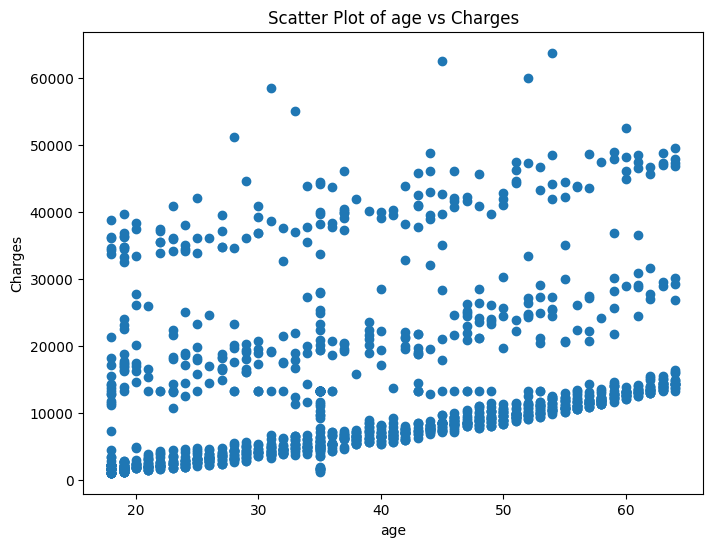

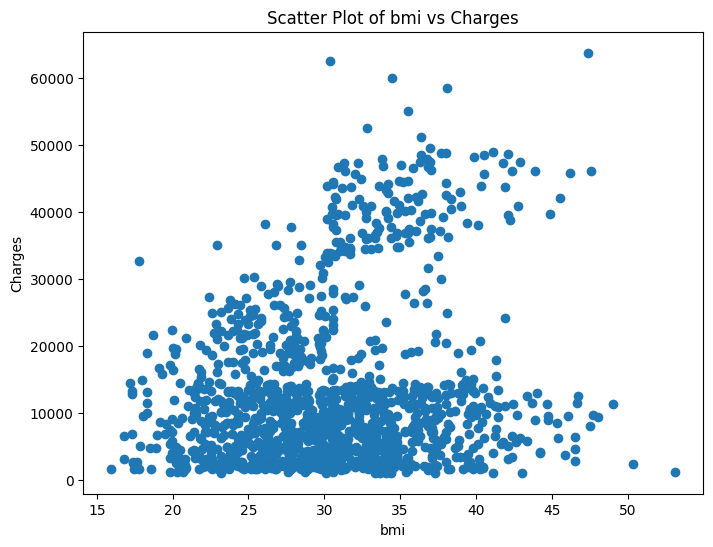

In [ ]:
# prompt: scatter plots between x variables and y(charges)

# scatter plots between x variables and y(charges)
numerical_features = ['age', 'bmi']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(insurance_df[feature], insurance_df['charges'])
  plt.xlabel(feature)
  plt.ylabel('Charges')
  plt.title(f'Scatter Plot of {feature} vs Charges')
  plt.show()


**Age and Charges**

General Trend: As age increases, there appears to be an upward trend in charges. Older individuals generally have higher charges compared to younger individuals.

Clusters: There seem to be distinct clusters of charges, particularly a dense lower cluster around charges below 10,000 and a more dispersed higher cluster above 30,000. This suggests that some individuals, regardless of age, incur very high charges.

Outliers: There are several points where individuals, particularly those in the 50-60 age range, have extremely high charges (above 50,000), indicating potential outliers or cases with very high medical costs.
In summary, charges tend to increase with age, but there is considerable variability, with some individuals incurring significantly higher costs.

**BMI and Charges**

Charges Increase with Higher BMI: While there is a concentration of data points in the lower charge range across most BMI values, there is a noticeable trend where individuals with higher BMI (around 30 and above) tend to have higher charges.

Clusters: There are distinct clusters of charges:

* A dense cluster of charges below 10,000 is present for most BMI values.
* A second cluster appears between 30,000 and 50,000 for individuals with a BMI greater than 30.

Outliers: Some individuals with BMI values in the 30–45 range incur charges exceeding 60,000, suggesting possible medical conditions that result in high healthcare costs.

In summary, while charges are generally concentrated in the lower range for most BMI values, higher BMI levels are associated with an increased likelihood of higher medical charges

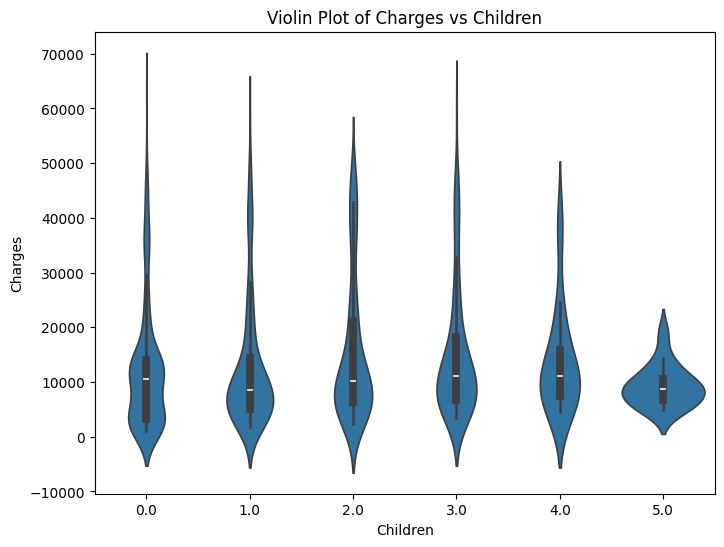

In [ ]:
# prompt: vilanin chart for charges and childern

plt.figure(figsize=(8, 6))
sns.violinplot(x='children', y='charges', data=insurance_df)
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Violin Plot of Charges vs Children')
plt.show()


**Insights**

Spread of Charges: For families with no children, the spread of charges is the widest. As the number of children increases, the spread narrows slightly, especially for families with 5 children.

Central Tendencies: Across all categories (0–5 children), the median charges (white dots) remain relatively similar, though slightly higher for families with 0 and 1 children.

Outliers: There are some extreme values (higher charges) visible for families with 0–4 children, but families with 5 children have a more compact distribution with fewer outliers.

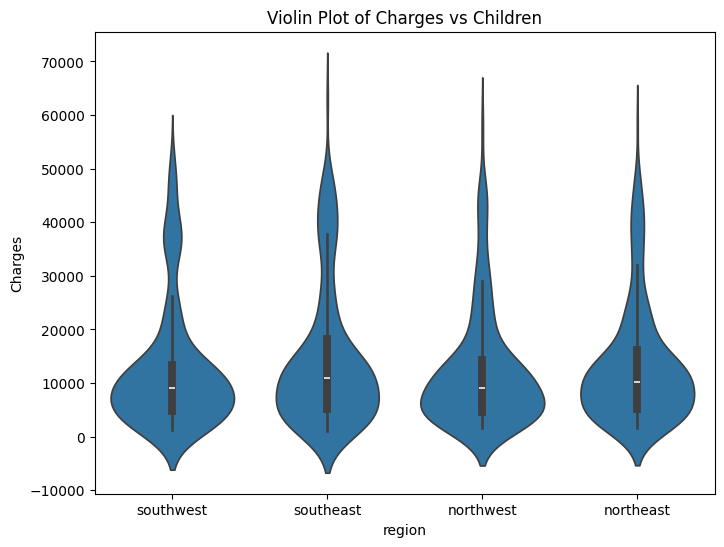

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='region', y='charges', data=insurance_df)
plt.xlabel('region')
plt.ylabel('Charges')
plt.title('Violin Plot of Charges vs Children')
plt.show()


**Insights**

Similar Distribution Across Regions: The overall shape of the distributions across all four regions (Southwest, Southeast, Northwest, Northeast) is quite similar, indicating that the spread of charges is consistent across different geographic locations.

Median Charges: The median (represented by the white dot) is fairly similar across the regions, though the Southeast region shows a slightly higher median compared to the others.

Wider Spread in Southeast: The Southeast region shows a wider spread in the upper range of charges, with individuals incurring higher costs (some reaching above 60,000). This suggests that the Southeast may have more cases with higher medical expenses compared to other regions.

Symmetry: The distributions in each region are relatively symmetric, with no extreme skewness in any region, except a few high-charge outliers particularly in the Southeast.

In summary, while charges are distributed similarly across regions, the Southeast has slightly higher median charges and a greater tendency for higher outlier costs.

**Insights**



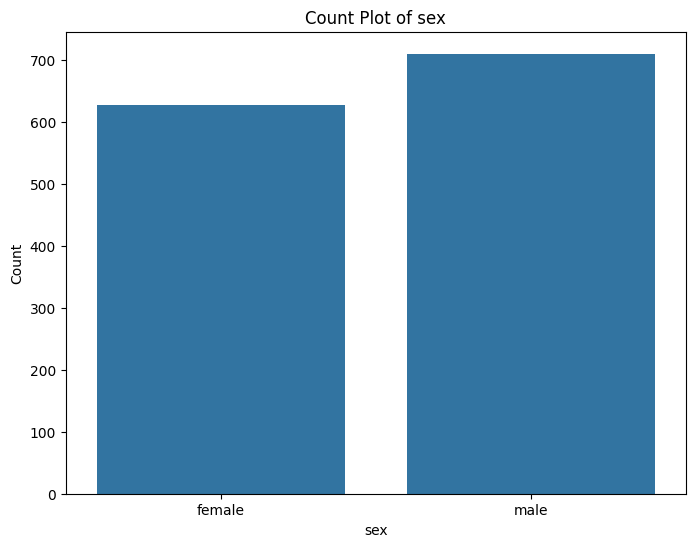

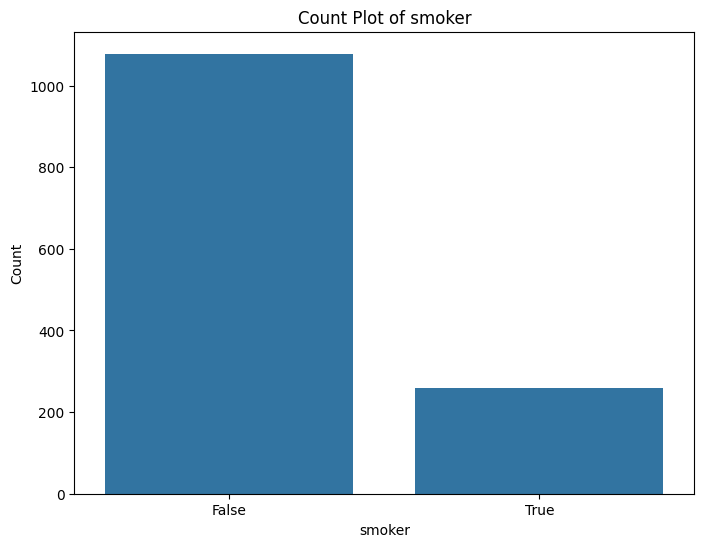

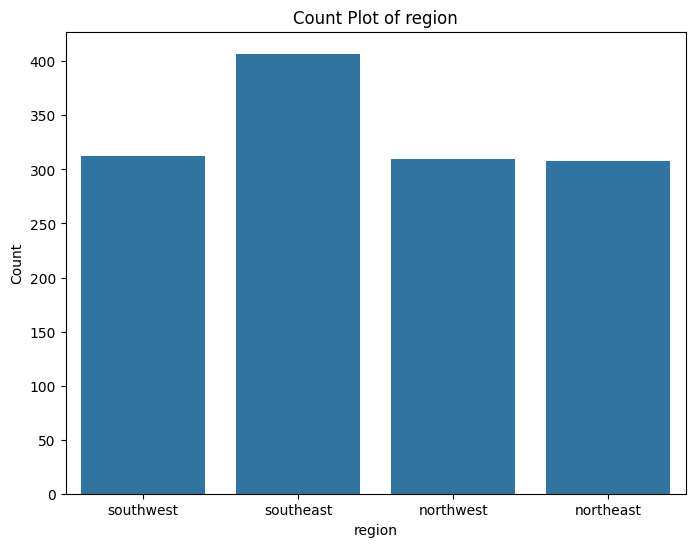

In [ ]:
# prompt: count charts for catorical columns

categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=insurance_df)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(f'Count Plot of {feature}')
  plt.show()


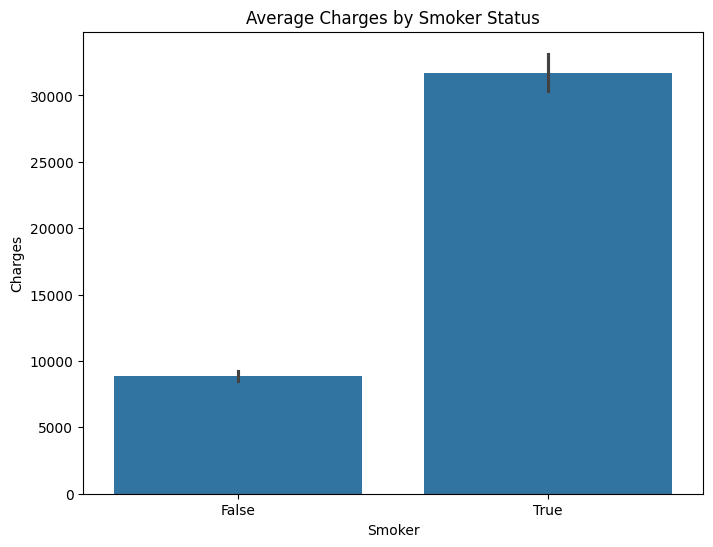

In [ ]:
#  bar chart smokeing vs non smoking and charges

plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=insurance_df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Average Charges by Smoker Status')
plt.show()


region
northeast    13300.342955
northwest    12352.721194
southeast    14474.781671
southwest    12650.933269
Name: charges, dtype: float64


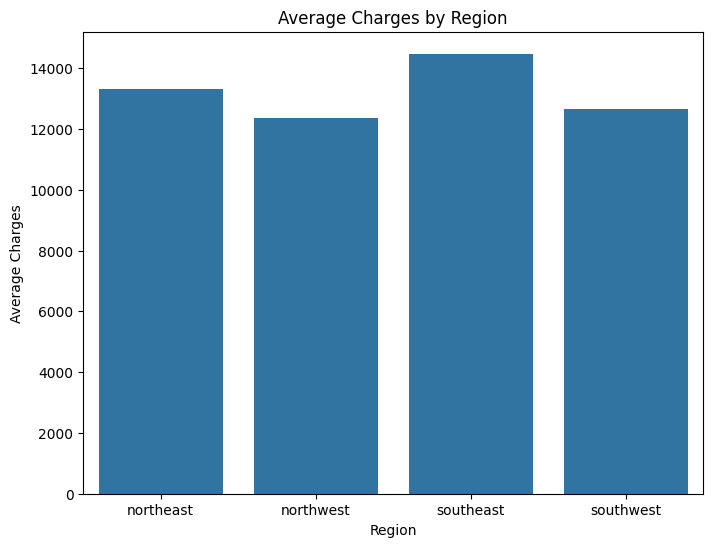

In [ ]:
#  charges by region

# Group by region and calculate the mean charges for each region
region_charges = insurance_df.groupby('region')['charges'].mean()

# Print the results
print(region_charges)

# Plot the average charges by region
plt.figure(figsize=(8, 6))
sns.barplot(x=region_charges.index, y=region_charges.values)
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Charges by Region')
plt.show()


Text(0, 0.5, 'Charges')

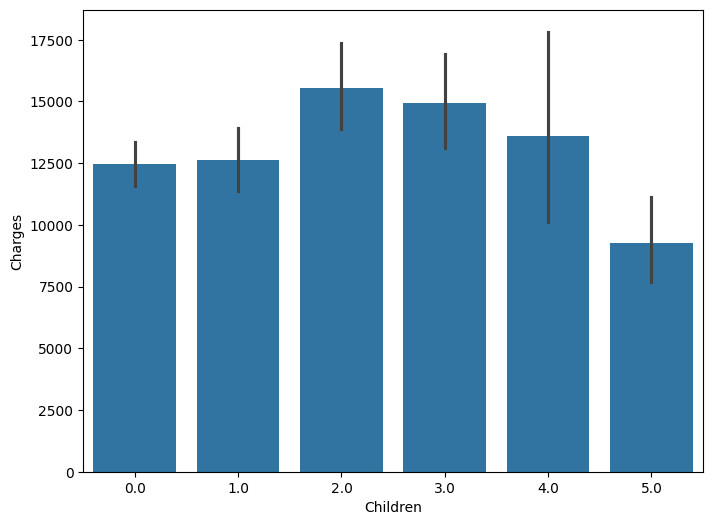

In [ ]:
# bar chart for charges by childern

plt.figure(figsize=(8, 6))
sns.barplot(x='children', y='charges', data=insurance_df)
plt.xlabel('Children')
plt.ylabel('Charges')

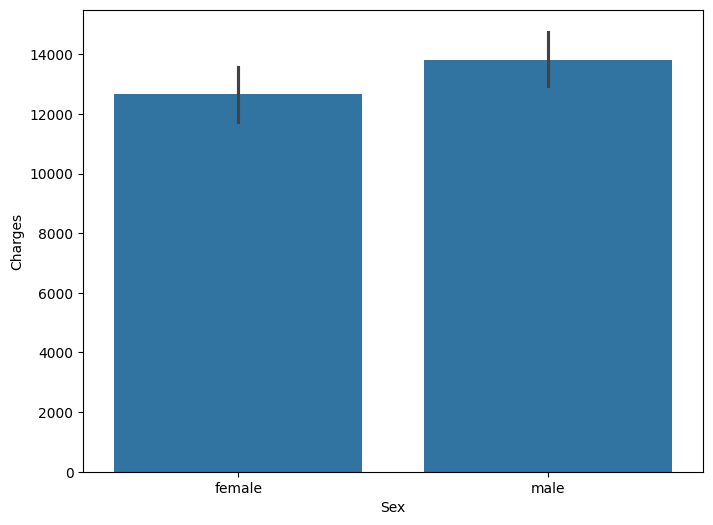

In [ ]:
# charges by sex

plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', data=insurance_df)
plt.xlabel('Sex')
plt.ylabel('Charges');

### Feature Engineering

In [ ]:
# summary stats
insurance_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.124907,30.560711,1.026926,13286.594256
std,13.749527,5.945186,1.190981,11843.439494
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.410000,0.000000,4922.920000
50%,38.000000,30.560000,1.000000,9869.810000
75%,51.000000,34.210000,2.000000,15230.320000
max,64.000000,53.130000,5.000000,63770.430000


**Insights**

Linear regression is sensitive to the scale of the data: The features (age, BMI, children, charges) have different ranges and variances. For example, "charges" has a much higher range (from 1,121.87 to 63,770.43) compared to "children" (0 to 5). This can lead to certain features dominating the regression due to their larger scale.

Since this is we will be using linear regression model standardization would be best

In [ ]:
# to starderalize the normuical features

# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical features to standardize
numerical_features = ['age', 'bmi', 'children', 'charges']

# Fit and transform the scaler on the numerical features
insurance_df[numerical_features] = scaler.fit_transform(insurance_df[numerical_features])

# Display the first few rows of the standardized dataset
print(insurance_df.head())


        age     sex       bmi  children  smoker     region   charges
0 -1.464228  female -0.447708 -0.862575    True  southwest  0.303938
1 -1.536985    male  0.540015 -0.022617   False  southeast -0.976521
2 -0.809415    male  0.410450  1.657299   False  southeast -0.746442
3 -0.445630    male -1.322692 -0.862575   False  northwest  0.734679
4 -0.518387    male -0.282807 -0.862575   False  northwest -0.795652


In [ ]:
newInsurance_df = pd.get_dummies(insurance_df, prefix='region', columns=['region'])

In [ ]:
newInsurance_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.464228,female,-0.447708,-0.862575,True,0.303938,False,False,False,True
1,-1.536985,male,0.540015,-0.022617,False,-0.976521,False,False,True,False
2,-0.809415,male,0.410450,1.657299,False,-0.746442,False,False,True,False
3,-0.445630,male,-1.322692,-0.862575,False,0.734679,False,True,False,False
4,-0.518387,male,-0.282807,-0.862575,False,-0.795652,False,True,False,False


In [ ]:
newInsurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   float64
 1   sex               1337 non-null   object 
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   float64
 4   smoker            1337 non-null   bool   
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   bool   
 7   region_northwest  1337 non-null   bool   
 8   region_southeast  1337 non-null   bool   
 9   region_southwest  1337 non-null   bool   
dtypes: bool(5), float64(4), object(1)
memory usage: 69.2+ KB


In [ ]:
insurance_df['region'].value_counts()

,count
region,
southeast,407
southwest,312
northwest,310
northeast,308


In [ ]:
# to avoid Multicollinearity it common practice to drop on columns.
# Its most seen as df_dummies = pd.get_dummies(df, drop_first=True)


newInsurance_df = newInsurance_df.drop(columns=['region_southeast'])



In [ ]:
newInsurance_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,-1.464228,female,-0.447708,-0.862575,True,0.303938,False,False,True
1,-1.536985,male,0.540015,-0.022617,False,-0.976521,False,False,False
2,-0.809415,male,0.410450,1.657299,False,-0.746442,False,False,False
3,-0.445630,male,-1.322692,-0.862575,False,0.734679,False,True,False
4,-0.518387,male,-0.282807,-0.862575,False,-0.795652,False,True,False


In [ ]:
# usng Label Encoding (Binary Encoding) for smokers

# because its a booling and python trees true/ fales as 0 and 1 astype works
newInsurance_df["smoker"] = newInsurance_df["smoker"].astype("int64")

# you could use a map and define 0 and 1 as well

In [ ]:
# binary ecodding sex

newInsurance_df['sex'] = newInsurance_df['sex'].map({'female': 0, 'male': 1})


In [ ]:
newInsurance_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,-1.464228,0,-0.447708,-0.862575,1,0.303938,False,False,True
1,-1.536985,1,0.540015,-0.022617,0,-0.976521,False,False,False
2,-0.809415,1,0.410450,1.657299,0,-0.746442,False,False,False
3,-0.445630,1,-1.322692,-0.862575,0,0.734679,False,True,False
4,-0.518387,1,-0.282807,-0.862575,0,-0.795652,False,True,False


all columns are in numbers or bool.  sklearn will take true/fales dummies so we dont need to make them 0 and 1

### split the data and make linear regression model

In [ ]:
#  split the data and build the model
# Define X (features) and y (target)
X = newInsurance_df.drop(columns=['charges'])
y = newInsurance_df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.37927661066317714
R-squared: 0.6783724831922626


**Highlights**

The MSE (Mean Squared Error) indicates the average squared difference between the actual and predicted values. The current MSE is relatively high at 0.38.

The R-squared value explains 67% of the variation in the target variable based on the features, which is considered moderate. While it's not an outstanding result, it’s also not the worst.

The smoker feature significantly contributes to the R-squared value. Dropping the smoker feature causes the R-squared to drop substantially, down to 0.12.

Age also has an important impact on the model. When age is removed as a feature, the R-squared decreases to 0.60